**Individual Machine Learning project**

*This notebook contains the full description of the end-to-end processing of a dataset where we compare the performance of K-Nearest Neighbors with that of a Support Vector Regression on a dataset*

# Setup

In [33]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# These are some basic imports that we will provide us with methods we will use throughout
import numpy as np
import os
import pandas as pd
from sklearn import metrics
import matplotlib as mpl
import matplotlib.pyplot as plt

np.random.seed(2)
import matplotlib as mpl
import matplotlib.pyplot as plt


**Note**: These are just some standard lines of code that we must do at the beginning such as importing libraries to use the methods, initializing the seed, and making plots easy to do.

# Download Dataset

In [34]:
mldata = pd.read_csv(r'mldata_0033190894.csv')
mldata
#These are some simple functions to visualize the dataset and make sure that it loaded correctly

,Unnamed: 0,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35
0,0,2,0.856230,-1.444653,-3.168676,1.039630,-1.086016,1.854955,-0.488724,-8.536382,...,-0.614766,-0.933342,2.853420,-1.637348,0.074341,6.437505,-3.574677,-1.511201,-0.151732,1.444001
1,1,0,-0.616487,-2.389926,-1.543191,-0.114450,-1.807820,2.448188,0.478326,-7.204420,...,-0.099012,-0.103394,-0.479144,-1.588516,-1.792253,-11.515789,8.204379,7.120196,-0.256808,1.614002
2,2,2,2.279533,-5.029015,-0.492771,0.842740,-1.435394,2.655731,1.694029,-9.802119,...,-0.556816,1.751281,-2.534807,-0.205057,-0.380939,-3.881687,-2.052677,4.039704,0.298753,2.285514
3,3,1,0.180093,0.189668,-0.024033,-1.081931,-2.858901,2.132286,-0.641150,-9.505870,...,-0.093198,0.148601,0.242751,0.462831,1.534077,3.434975,-1.853387,4.199739,0.707841,3.634413
4,4,2,0.028863,2.456311,-0.403039,-0.275751,-0.625809,-0.702411,-0.703223,2.815640,...,0.750877,-1.448141,-0.369110,-0.224846,0.039227,2.130816,-0.443308,-2.897663,-1.245601,1.523309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,2,1.388476,1.326300,0.985798,-0.312407,-1.254363,-0.020020,-1.108516,-2.055516,...,-0.126333,-0.389083,1.182231,1.022518,0.175598,6.625219,-0.799869,-0.083363,0.648693,2.218586
996,996,2,-0.354843,1.083478,4.507280,0.190419,0.858767,0.787992,-1.323024,-0.525779,...,-0.400370,0.164161,0.506577,1.762731,0.306356,-6.538751,5.265449,2.488655,-0.164004,2.682318
997,997,0,-0.014576,0.354256,-1.432825,-1.171111,3.431369,1.497358,0.637182,-13.823271,...,0.402981,0.000766,-0.788993,0.846219,-0.369730,0.386754,5.117681,4.757587,-1.123269,3.998695
998,998,0,-0.509025,-0.043418,1.106354,2.240033,0.583139,1.489572,-0.373152,-10.489585,...,-0.877163,-1.408453,-1.893682,-0.831144,-1.098429,5.614377,-1.054739,2.119580,-1.059481,1.910906


In [35]:
#The data seems to load fine and we call the raw set mldata

# Create Data-Frame

In [36]:
features = pd.DataFrame(mldata, columns=['feature_1','feature_2','feature_3','feature_4','feature_5','feature_6','feature_7','feature_8','feature_9','feature_10','feature_11','feature_12','feature_13','feature_14','feature_15','feature_16','feature_17','feature_18','feature_19','feature_20','feature_21','feature_22','feature_23','feature_24','feature_25','feature_26','feature_27','feature_28','feature_29','feature_30','feature_31','feature_32','feature_33','feature_34','feature_35'])
features.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35
0,0.856230,-1.444653,-3.168676,1.039630,-1.086016,1.854955,-0.488724,-8.536382,0.550815,-1.340363,...,-0.614766,-0.933342,2.853420,-1.637348,0.074341,6.437505,-3.574677,-1.511201,-0.151732,1.444001
1,-0.616487,-2.389926,-1.543191,-0.114450,-1.807820,2.448188,0.478326,-7.204420,-0.209655,-0.620060,...,-0.099012,-0.103394,-0.479144,-1.588516,-1.792253,-11.515789,8.204379,7.120196,-0.256808,1.614002
2,2.279533,-5.029015,-0.492771,0.842740,-1.435394,2.655731,1.694029,-9.802119,-1.203694,-1.117392,...,-0.556816,1.751281,-2.534807,-0.205057,-0.380939,-3.881687,-2.052677,4.039704,0.298753,2.285514
3,0.180093,0.189668,-0.024033,-1.081931,-2.858901,2.132286,-0.641150,-9.505870,1.668034,-0.042687,...,-0.093198,0.148601,0.242751,0.462831,1.534077,3.434975,-1.853387,4.199739,0.707841,3.634413
4,0.028863,2.456311,-0.403039,-0.275751,-0.625809,-0.702411,-0.703223,2.815640,0.158170,-0.877626,...,0.750877,-1.448141,-0.369110,-0.224846,0.039227,2.130816,-0.443308,-2.897663,-1.245601,1.523309


In [37]:
targets = pd.DataFrame(mldata, columns=["label"])
targets.head()

,label
0,2
1,0
2,2
3,1
4,2


In [38]:
features_and_labels = pd.concat([features, targets], axis=1)
features_and_labels.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,label
0,0.856230,-1.444653,-3.168676,1.039630,-1.086016,1.854955,-0.488724,-8.536382,0.550815,-1.340363,...,-0.933342,2.853420,-1.637348,0.074341,6.437505,-3.574677,-1.511201,-0.151732,1.444001,2
1,-0.616487,-2.389926,-1.543191,-0.114450,-1.807820,2.448188,0.478326,-7.204420,-0.209655,-0.620060,...,-0.103394,-0.479144,-1.588516,-1.792253,-11.515789,8.204379,7.120196,-0.256808,1.614002,0
2,2.279533,-5.029015,-0.492771,0.842740,-1.435394,2.655731,1.694029,-9.802119,-1.203694,-1.117392,...,1.751281,-2.534807,-0.205057,-0.380939,-3.881687,-2.052677,4.039704,0.298753,2.285514,2
3,0.180093,0.189668,-0.024033,-1.081931,-2.858901,2.132286,-0.641150,-9.505870,1.668034,-0.042687,...,0.148601,0.242751,0.462831,1.534077,3.434975,-1.853387,4.199739,0.707841,3.634413,1
4,0.028863,2.456311,-0.403039,-0.275751,-0.625809,-0.702411,-0.703223,2.815640,0.158170,-0.877626,...,-1.448141,-0.369110,-0.224846,0.039227,2.130816,-0.443308,-2.897663,-1.245601,1.523309,2


In [39]:
#After loading the data, we want to create a data frame that rearranges some of the columns

# Train/Test Split

In [40]:
from sklearn.model_selection import train_test_split
training_set, testing_set = train_test_split(features_and_labels)

In [41]:
# This is a standard train and test split function that separates our data into training and testing sets for our model

# Standarizing the Data

In [42]:
from sklearn.preprocessing import StandardScaler


#We must standardize the data but to do this, we have to remove the target columns to make sure they are not standardized.
#If they are standardized, they will become continuous variables and will no longer be an acceptable data type in the model training
training_features = training_set.drop(columns = "label")
training_targets = training_set["label"]
testing_features = testing_set.drop(columns = "label")
testing_targets = testing_set["label"]

scaler = StandardScaler()
training_features_scaled = scaler.fit_transform(training_features)
testing_features_scaled = scaler.transform(testing_features)


**Note**: Since K-Nearest Neighbors uses a distance function to compute the data points that are closest, it is important to standardize the data to not give a higher weight unneccesarily to any specific features with different scales. We also must do this AFTER the training/testing split in order to avoid data leakage. The test set will no longer be completely separated from the training set if we do this before hand because it will have been standardized together.

# K-Nearest Neighbors Classifier w/ Sklearn

Accuracy: 0.664 Best Number of Neighbors: 1
Accuracy: 0.664 Best Number of Neighbors: 1
Accuracy: 0.664 Best Number of Neighbors: 1
Accuracy: 0.664 Best Number of Neighbors: 1
Accuracy: 0.696 Best Number of Neighbors: 5
Accuracy: 0.696 Best Number of Neighbors: 5
Accuracy: 0.696 Best Number of Neighbors: 5
Accuracy: 0.696 Best Number of Neighbors: 5
Accuracy: 0.696 Best Number of Neighbors: 5
Accuracy: 0.696 Best Number of Neighbors: 5
Accuracy: 0.696 Best Number of Neighbors: 5
Accuracy: 0.696 Best Number of Neighbors: 5
Accuracy: 0.696 Best Number of Neighbors: 5
Accuracy: 0.7 Best Number of Neighbors: 14
Accuracy: 0.7 Best Number of Neighbors: 14
Accuracy: 0.712 Best Number of Neighbors: 16
Accuracy: 0.712 Best Number of Neighbors: 16
Accuracy: 0.712 Best Number of Neighbors: 16
Accuracy: 0.712 Best Number of Neighbors: 16
Accuracy: 0.712 Best Number of Neighbors: 16
Accuracy: 0.712 Best Number of Neighbors: 16
Accuracy: 0.712 Best Number of Neighbors: 16
Accuracy: 0.712 Best Number

Text(0.5, 0, 'K Neighbors')

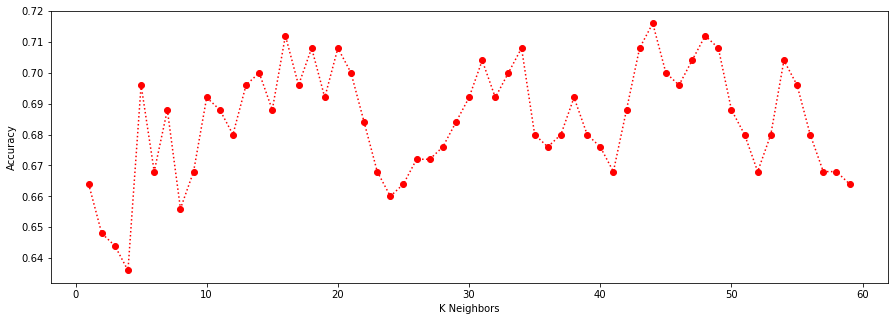

In [43]:
from sklearn.neighbors import KNeighborsClassifier
best_n_neighbors = 0
best_score = 0
accuracy_list = []


#Here we manually optimize our parameters since we just have 1 to adjust. We fit our data to the model and if if the score
#from it is better than the current score, we replace the best score.
for i in range(1,60):
    
    knc = KNeighborsClassifier(n_neighbors = i)
    knc.fit(training_features_scaled,training_targets)
    pred = knc.predict(testing_features_scaled)
    score = metrics.accuracy_score(testing_targets, pred)
    if best_score<score:
        best_score = score
        best_n_neighbors = i
    accuracy_list.append(score)
    print("Accuracy:",best_score,"Best Number of Neighbors:",best_n_neighbors)
    
#I think it is interesting to see a graph of how the performance shifts based on N with a line graph
plt.figure(figsize=(15,5))
plt.plot(range(1,60),accuracy_list,color = 'red',linestyle='dotted',marker = 'o')
plt.ylabel('Accuracy')
plt.xlabel('K Neighbors')

**Note**:We use a for loop to decide the best number of neighbors based on the accuracy computed with our accuracy_score method. It performed best at 44 neighbors and had an accuracy of 71.6%. This graph here also shows how the accuracy varies with different K values. We can see that it tops out at 44 neighbors. Now we will see how SVC compares to KNN.

# Support Vector Classification

In [44]:
from sklearn import svm

**Note**: Here, we have many options for the kernel option of the SVM model. ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’. Given that the data cannot be easily visualized, it will help us to try many different kernels to see which kernel will best fit our data.  We will also attempt to change the C value (regularization term) to see if we are missing out on higher performance due to some outliers.

In [45]:
#We can implement a grid search method to find the best parameters that prints the best score w/ corresponding parameters.

Accuracy Score : 0.784 {'C': 10, 'kernel': 'rbf'}


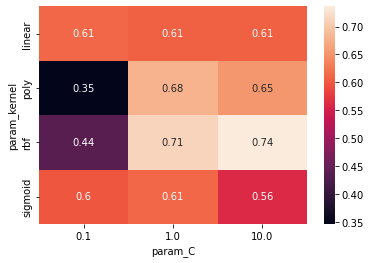

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import seaborn as sns

svclassifier = svm.SVC()

grid = {'kernel': ['rbf', 'sigmoid', 'poly','linear'],'C':[0.1,1,10]}
#We leave out precomputed because our inputs are not considered valid for that type of kernel


gridsearch = GridSearchCV(svclassifier, param_grid = grid,scoring = 'accuracy')
gridsearch.fit(training_features_scaled,training_targets)

#Predict values w/ grid search params
predicted_test_targets = gridsearch.predict(testing_features_scaled)

print('Accuracy Score : ' + str(accuracy_score(testing_targets,predicted_test_targets)),gridsearch.best_params_)

#With some additional tools such as the seaborn library, we can create this useful graph that shows how the performance
#changes with differences in the hyperparameter grid.
pivot = pd.pivot_table(pd.DataFrame(gridsearch.cv_results_),values='mean_test_score',index='param_kernel',columns='param_C')

grid_search_table = sns.heatmap(pivot,annot = True)

**Note**: The results here start from a mean score as low as 35% accuracy which is very subbar performance for this data. Clearly the radial basis function with C value of 10 is the winner for the hyperparameter competition as it performs at 78.4% accuracy or a mean test score of 74%

# Conclusion

**Note**: In conclusion, the SVM classifier outperformed the K Nearest Neighbors model using parameters 'rbf' for the kernel and 10 for the C value with performance 78.4%. This model outperformed KNN with the optimal parameter of 44 neighbors giving it an accuracy score of 71.6%.